In [1]:
import numpy as np
import os
import sys

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import HullForce, ControlForce, TowingForce
from model.RigidBody import RigidBody
from model.Simulation import Simulation, Simulation_Result

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Set parameters
m = 0.877 # kg
Vol = 733159.45810955 * 10 ** (-9)
Iyy = 6610.17475482 * 10 * (-6)
hull_surface_area = 0.1

r_xi = -111.76 * 10 ** (-3)
r_zi = 0.722 * 10 ** (-3)

r_xh = 0
r_zh = 0

r_xb = 0
r_zb = 0

r_xt = 42.9 * 10 ** (-3)
r_zt = -35.18 * 10 ** (-3)

rho = 1000

# Aero foil parameters
A = 2.61
C_L_a = 1 / 5 
C_D_0 = 0.02



In [3]:
rigidbody = RigidBody(m, Vol, Iyy, np.array([r_xb, r_zb]))
towForce = TowingForce(np.array([r_xt,r_zt]),10,np.deg2rad(30))
controlForce = ControlForce(np.array([r_xi,r_zi]),np.deg2rad(-5),A,C_L_a,C_D_0)
hullForce = HullForce(hull_surface_area,np.array([r_xh,r_zh]))

sim = Simulation(rigidbody,towForce,hullForce,[controlForce])

In [4]:
pitch_angle = -6
sim.initialize_system(initial_state=np.array([0, 0, 0, 2, 0, 0, 0, 0, 0]))
# Solve forces
sim.solve_forces(0)

# Calculate sum of forces/moments
total_force_x, total_force_z = sim.rigidbody.sum_forces(pitch_angle) 
total_moment_y = sim.rigidbody.sum_moments(pitch_angle)

print(total_force_x)
print(total_force_z)
print(total_moment_y)

-268.1015206499935
31.59876512040063
8.952059728301544


In [5]:
result_LS = sim.solve_equilibrium_state_LS(2)

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.01           degrees   
Delta_t         10.82           degrees   
Towing Force    293.75          N         
Delta_i         -3.69           degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!


In [6]:
results_SQRT = sim.solve_equilibrium_state_sqrt(2)

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.00           degrees   
Delta_t         10.83           degrees   
Towing Force    293.75          N         
Delta_i         -3.69           degrees   
----------------------
Fx constraint   -0.00           N         
Fz constraint   -0.00           N         
My constraint   0.00            Nm        
Objective Function Value: 4.6201826120280987e-10
Optimization successful!


In [7]:
results = sim.solve_equilibrium_state_min_FT(2)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 293.7472273786522
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.00           degrees   
Delta_t         10.83           degrees   
Towing Force    293.75          N         
Delta_i         -3.69           degrees   
----------------------
Fx constraint   -0.00           N         
Fz constraint   -0.00           N         
My constraint   0.00            Nm        
Objective Function Value: 293.7472273786522
Optimization successful!


In [8]:
results = sim.solve_equilibrium_state_fsolve_fixed_pitch(5, -6)

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Delta_i         1.43            degrees   
Delta_t         -17984.31       degrees   
Towing Force    2548.66         N         
----------------------
Total Force X   0.00            N         
Total Force Z   0.00            N         
Total Moment Y  -0.00           Nm        
Optimization successful!


In [9]:
results = sim.solve_equilibrium_state_fsolve_fixed_delta_i(2, -5)
# results = sim.solve_equilibrium_state_sqrt(2)


Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     26.35           degrees   
Delta_t         -5372.73        degrees   
Towing Force    266.55          N         
----------------------
Total Force X   0.00            N         
Total Force Z   0.00            N         
Total Moment Y  -0.00           Nm        
Optimization successful!


In [10]:
pitch_angle_upper_bounds = np.linspace(-7, 7, 14)
towForces = np.zeros_like(pitch_angle_upper_bounds)
delta_ts = np.zeros_like(pitch_angle_upper_bounds)
delta_is = np.zeros_like(pitch_angle_upper_bounds)

for i, pitch_angle_ub in enumerate(np.deg2rad(pitch_angle_upper_bounds)):
    sim.ub_pitch_angle = pitch_angle_ub
    sim.lb_pitch_angle = pitch_angle_ub - np.deg2rad(0.01)
    sim.bounds[0] = (pitch_angle_ub - np.deg2rad(0.01), pitch_angle_ub)
    result_LS = sim.solve_equilibrium_state_sqrt(2)

    delta_ts[i] = np.rad2deg(result_LS.x[1])
    towForces[i] = result_LS.x[2]
    delta_is[i] = np.rad2deg(result_LS.x[3])


Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -7.00           degrees   
Delta_t         9.11            degrees   
Towing Force    294.54          N         
Delta_i         -3.52           degrees   
----------------------
Fx constraint   0.00            N         
Fz constraint   -0.00           N         
My constraint   0.00            Nm        
Objective Function Value: 4.698655036702933e-10
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -5.92           degrees   
Delta_t         9.73            degrees   
Towing Force    294.30          N         
Delta_i         -3.58           degrees   
----------------------
Fx constraint   0.00            N         
Fz constraint   -0.00           N         
My constraint   0.00            Nm        
Objective Function Value: 3.6262667071802257e-10
Optimiza

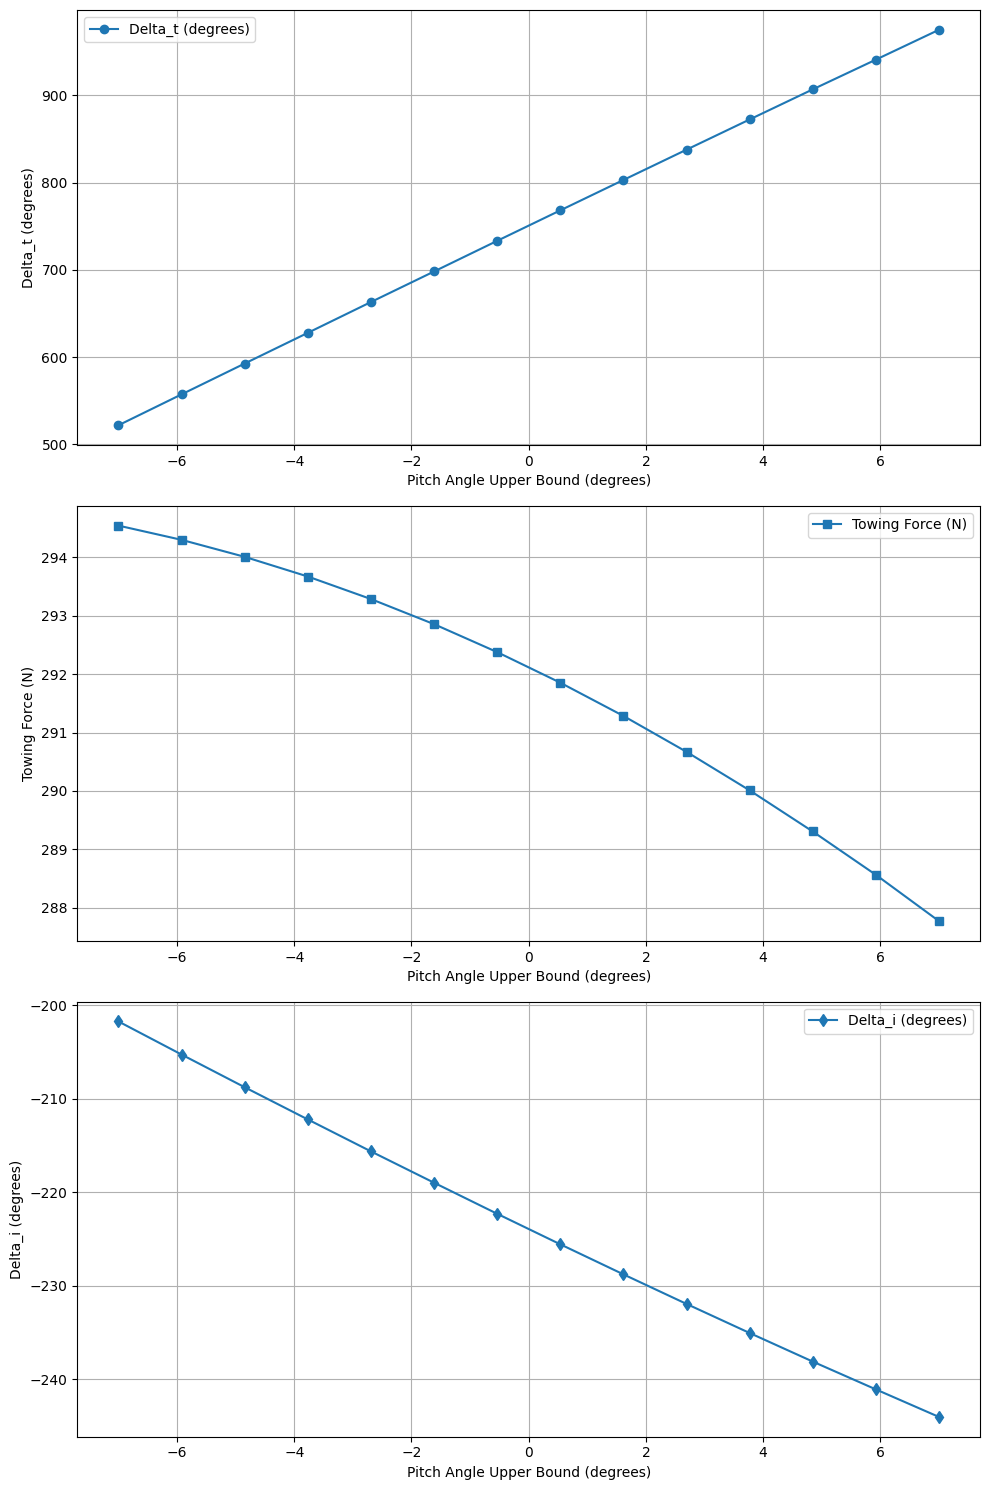

In [11]:
import matplotlib.pyplot as plt

# Plotting results
fig, ax = plt.subplots(3, 1, figsize=(10, 15))  # 3 plots vertically

# Plot 1: Delta_t vs Pitch Angle Upper Bound
ax[0].plot(pitch_angle_upper_bounds, np.rad2deg(delta_ts), 'o-', label='Delta_t (degrees)')
ax[0].set_xlabel('Pitch Angle Upper Bound (degrees)')
ax[0].set_ylabel('Delta_t (degrees)')
ax[0].legend()
ax[0].grid(True)

# Plot 2: Towing Force vs Pitch Angle Upper Bound
ax[1].plot(pitch_angle_upper_bounds, towForces, 's-', label='Towing Force (N)')
ax[1].set_xlabel('Pitch Angle Upper Bound (degrees)')
ax[1].set_ylabel('Towing Force (N)')
ax[1].legend()
ax[1].grid(True)

# Plot 3: Delta_i vs Pitch Angle Upper Bound
ax[2].plot(pitch_angle_upper_bounds, np.rad2deg(delta_is), 'd-', label='Delta_i (degrees)')
ax[2].set_xlabel('Pitch Angle Upper Bound (degrees)')
ax[2].set_ylabel('Delta_i (degrees)')
ax[2].legend()
ax[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

    

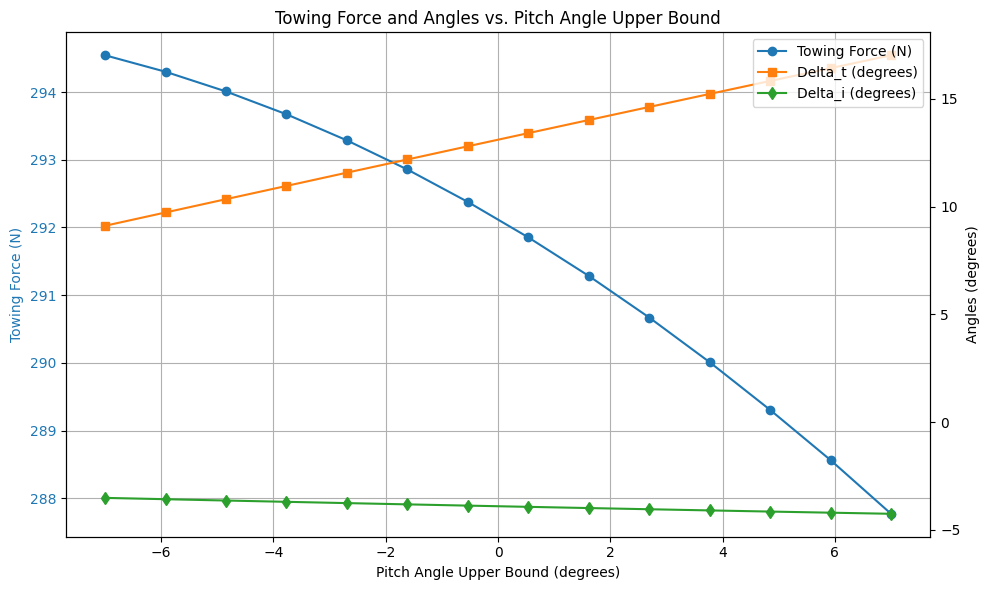

In [12]:
# Create the figure and twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot towing force on the primary y-axis
ax1.plot(pitch_angle_upper_bounds, towForces, 'o-', color='tab:blue', label='Towing Force (N)')
ax1.set_xlabel('Pitch Angle Upper Bound (degrees)')
ax1.set_ylabel('Towing Force (N)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot delta_t and delta_i on the secondary y-axis
ax2.plot(pitch_angle_upper_bounds, delta_ts, 's-', color='tab:orange', label='Delta_t (degrees)')
ax2.plot(pitch_angle_upper_bounds, delta_is, 'd-', color='tab:green', label='Delta_i (degrees)')

ax2.set_ylabel('Angles (degrees)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Adjust layout and show the plot
plt.title('Towing Force and Angles vs. Pitch Angle Upper Bound')
plt.tight_layout()
plt.show()


In [22]:
initial_state = np.zeros(9)
initial_state[3] = 2
initial_state[2] = result_LS.x[0]
sim_result  =  sim.simulate_forward_euler(N = 10, dt = 0.2, initial_state=initial_state)

1
2
3
4
5
6
7
8
9


In [26]:
np.rad2deg(sim_result.pitch_angle)

array([ 6.99000000e+000,  6.98999918e+000,  6.99001100e+000,
        6.98712191e+000,  1.71775980e+002, -4.26272272e+011,
        6.45156244e+030, -6.05872352e+067,  4.87766179e+143,
        6.94586180e+294])

In [27]:
sim_result.bf_velocity

array([[ 1.98513481e+000, -2.43392219e-001],
       [ 2.50204700e+000,  2.66097852e+000],
       [ 2.82794641e+001, -4.33846458e+001],
       [ 9.18776562e+003,  9.78913567e+003],
       [ 2.62166337e+008, -6.07287693e+008],
       [ 2.99673222e+018,  1.42454783e+018],
       [ 7.22216324e+035, -1.18146366e+037],
       [ 1.11616900e+075,  3.28435924e+074],
       [-8.27181960e+149, -3.02217928e+150],
       [ 6.86552855e+301, -1.84121159e+301]])

In [24]:
sim_result.inertial_velocity

array([[ 2.00000000e+000,  0.00000000e+000],
       [ 2.15961957e+000,  2.94568993e+000],
       [ 3.33490164e+001, -3.96206851e+001],
       [ 7.92817489e+003,  1.08344939e+004],
       [ 3.34093635e+008, -5.70886130e+008],
       [-3.16968769e+018, -9.81234139e+017],
       [-1.13230441e+037, -3.44904451e+036],
       [ 8.67409095e+074, -7.75438498e+074],
       [ 2.54393587e+150, -1.82925883e+150],
       [-6.42993403e+301, -3.03009750e+301]])

In [29]:
sim_result.bf_acceleration

array([[ 0.00000000e+000,  0.00000000e+000],
       [ 2.58456093e+001,  1.45218537e+002],
       [ 1.28887085e+003, -2.30228122e+003],
       [ 4.57974308e+005,  4.91626016e+005],
       [ 1.31078575e+010, -3.03648741e+010],
       [ 1.49836611e+020,  7.12273914e+019],
       [ 3.61108162e+037, -5.90731832e+038],
       [ 5.58084502e+076,  1.64217962e+076],
       [-4.13590980e+151, -1.51108964e+152],
       [ 3.43276428e+303, -9.20605794e+302]])

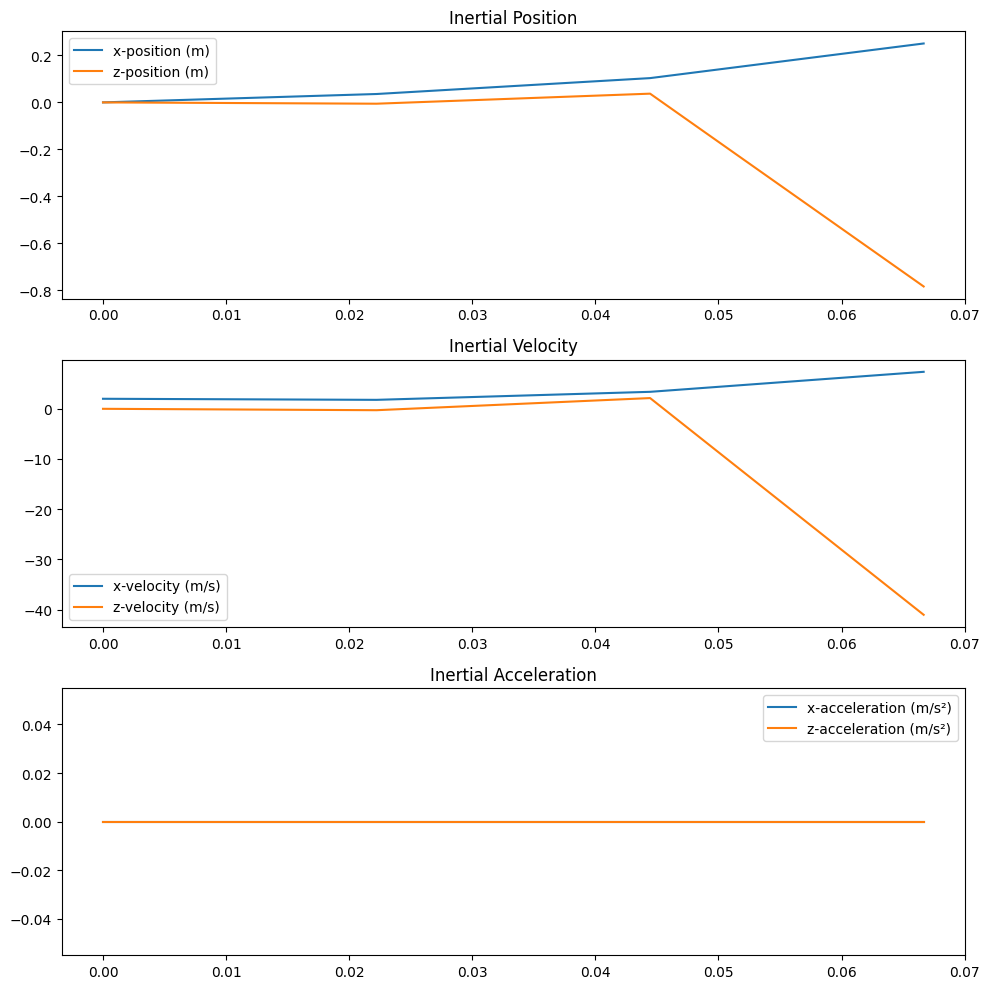

ValueError: x and y must have same first dimension, but have shapes (4,) and (10,)

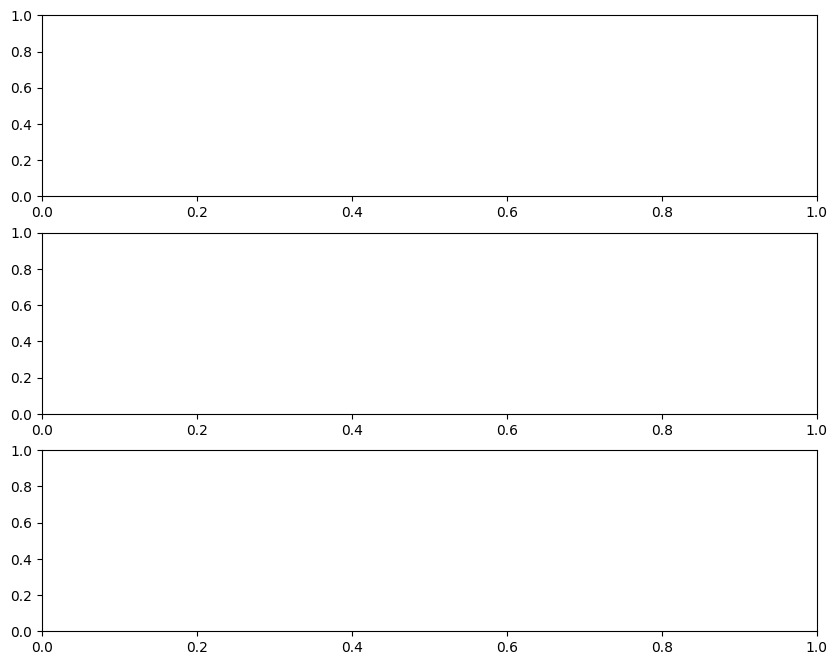

In [17]:
sim_result.plot_simulation_results(-6)